In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print(pd.__version__)
print(sns.__version__)

1.3.5
0.12.0


In [3]:
df = sns.load_dataset("mpg")
df.shape

(398, 9)

In [6]:
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320


In [7]:
df.tail(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [10]:
df.isnull().mean()

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      0.015075
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
name            0.000000
dtype: float64

<AxesSubplot:>

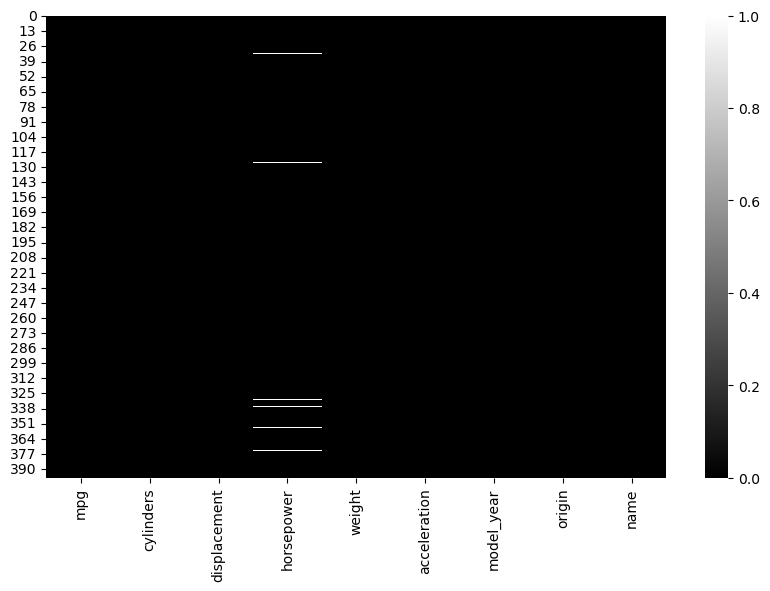

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="gray")

In [16]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [17]:
df.describe(include="object")

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


In [20]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

<AxesSubplot:xlabel='origin', ylabel='count'>

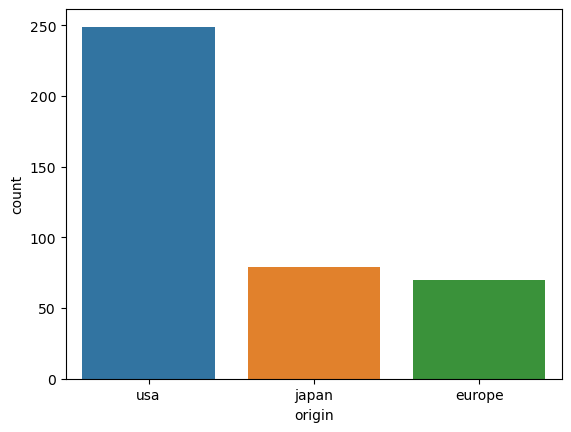

In [25]:
sns.countplot(data=df, x="origin")

<AxesSubplot:xlabel='count', ylabel='origin'>

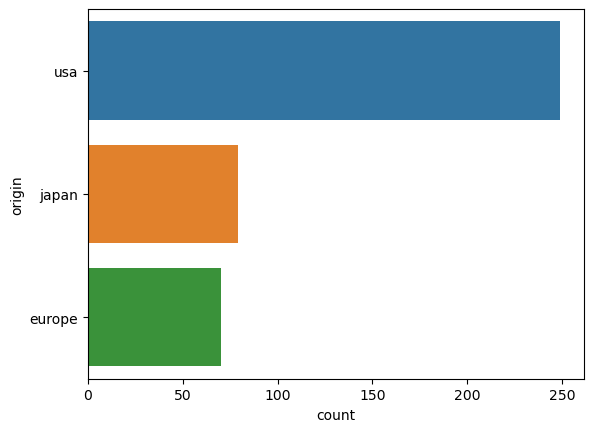

In [32]:
sns.countplot(data=df, y="origin")

## 1개 변수의 빈도수

In [27]:
# origin의 빈도 수 구하기
df["origin"].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

## 2개 이상의 변수에 대한 빈도수

<AxesSubplot:xlabel='origin', ylabel='count'>

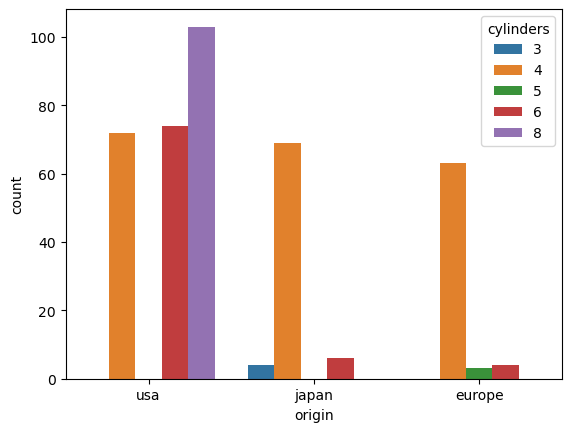

In [28]:
# countplot 으로 origin 의 빈도수를 시각화, cylinders에 따라 다른 색상으로 표현
sns.countplot(data=df, x="origin", hue="cylinders")

<AxesSubplot:xlabel='cylinders', ylabel='count'>

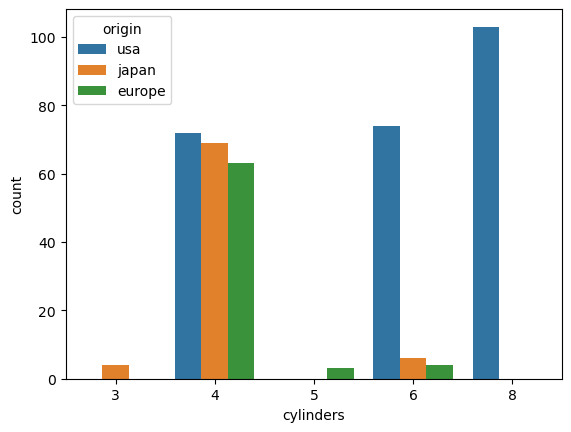

In [29]:
# countplot 으로 cylinders 의 빈도수를 시각화, origin에 따라 다른 색상으로 표현
sns.countplot(data=df, x="cylinders", hue="origin")

In [33]:
# pd.crosstab 으로 시각화
pd.crosstab(index=df['origin'], columns=df['cylinders'])

cylinders,3,4,5,6,8
origin,,,,,
europe,0,63,3,4,0
japan,4,69,0,6,0
usa,0,72,0,74,103


## 범주형 vs 수치형 변수

/var/folders/ql/gbsdt1191mbf_hk8mhnwwpd80000gn/T/ipykernel_97563/1472170484.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='origin', y='mpg', ci=None)


<AxesSubplot:xlabel='origin', ylabel='mpg'>

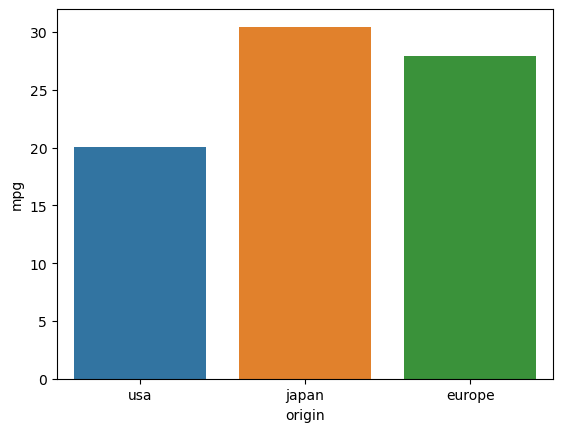

In [37]:
# ci -> errorbar로 대체
# 데이터가 많아질수록 ci 구하는 것은 매우 오래걸림
sns.barplot(data=df, x='origin', y='mpg', ci=None)

## groupby를 통한 연산

In [40]:
# origin 별로 그룹화하고 mpg의 평균 구하기
# Series type
df.groupby("origin")["mpg"].mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

In [41]:
# Dataframe type
df.groupby("origin")[["mpg"]].mean()

,mpg
origin,
europe,27.891429
japan,30.450633
usa,20.083534


## pivot table을 통한 연산
* groupby와 같은 기능
* 왜 존재할까?
    * 더 직관적으로 만들기 위함, 내부는 groupby로 동작

In [49]:
# pivot_table 로 같은 값 구하기
pd.pivot_table(data=df, index='origin', values='mpg')

,mpg
origin,
europe,27.891429
japan,30.450633
usa,20.083534


<AxesSubplot:xlabel='origin', ylabel='mpg'>

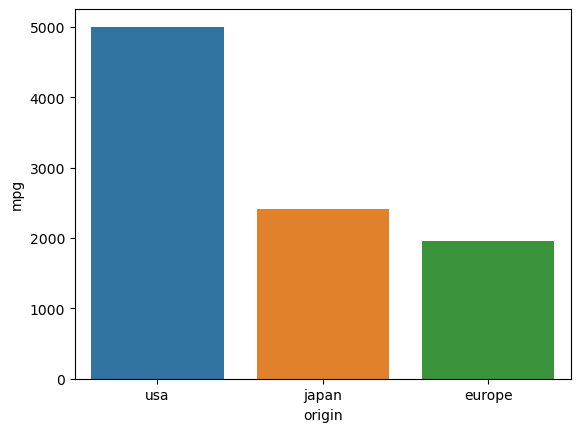

In [63]:
sns.barplot(data=df, x='origin', y='mpg', estimator='sum', errorbar=None)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

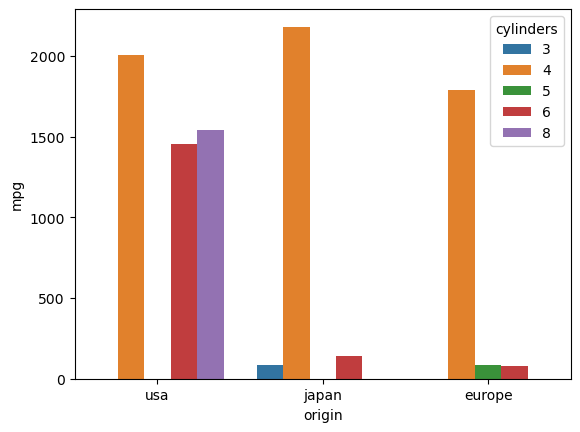

In [75]:
sns.barplot(data=df, x='origin', y='mpg', estimator='sum', hue='cylinders', errorbar=None)

In [81]:
df.groupby(['origin', 'cylinders'])[['mpg']].mean()

mpg
origin cylinders           
europe 4          28.411111
       5          27.366667
       6          20.100000
japan  3          20.550000
       4          31.595652
       6          23.883333
usa    4          27.840278
       6          19.663514
       8          14.963107

In [82]:
# unstack = 마지막 index를 column으로 끌어올리는 기능
df.groupby(['origin', 'cylinders'])[['mpg']].mean().unstack()

mpg                                            
cylinders      3          4          5          6          8
origin                                                      
europe       NaN  28.411111  27.366667  20.100000        NaN
japan      20.55  31.595652        NaN  23.883333        NaN
usa          NaN  27.840278        NaN  19.663514  14.963107

In [83]:
pd.pivot_table(data=df, index='origin', columns='cylinders', values='mpg')

cylinders,3,4,5,6,8
origin,,,,,
europe,NaN,28.411111,27.366667,20.100000,NaN
japan,20.55,31.595652,NaN,23.883333,NaN
usa,NaN,27.840278,NaN,19.663514,14.963107


<AxesSubplot:xlabel='origin', ylabel='mpg'>

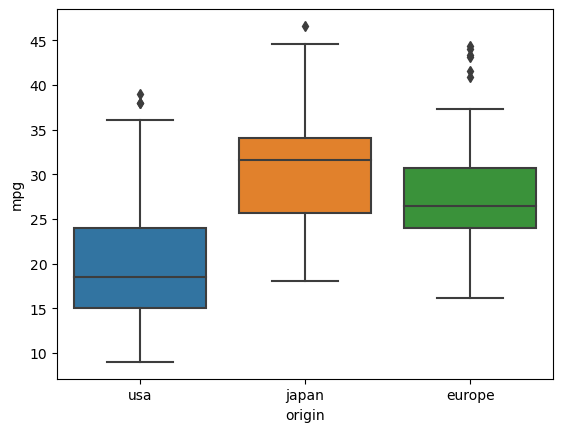

In [85]:
# boxplot 으로 origin 별 mpg 의 기술통계
sns.boxplot(data=df, x='origin', y='mpg')

In [92]:
# origin 별로 groupby 하고 기술통계 값을 출력
# boxplot과 데이터 비교
desc = df.groupby("origin")["mpg"].describe()
eu = desc.loc["europe"]
eu

count    70.000000
mean     27.891429
std       6.723930
min      16.200000
25%      24.000000
50%      26.500000
75%      30.650000
max      44.300000
Name: europe, dtype: float64

## 박스플롯 이해하기

In [96]:
# IQR, 이상치를 제외한 최댓값, 최솟값 구하기 
Q3 = eu["75%"]
Q1 = eu["25%"]
IQR = Q3 - Q1
OUT_MAX = 1.5 * IQR + Q3
OUT_MIN = Q1 - 1.5 * IQR
Q3, Q1, IQR, OUT_MAX, OUT_MIN

(30.65, 24.0, 6.649999999999999, 40.625, 14.025000000000002)

<AxesSubplot:xlabel='mpg'>

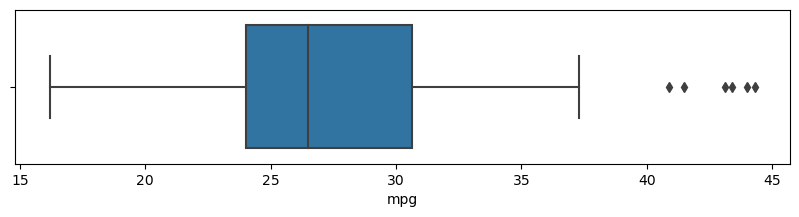

In [98]:
# europe 에 해당하는 값에 대해 boxplot
plt.figure(figsize=(10, 2))
sns.boxplot(data=df[df['origin'] == "europe"], x="mpg")

<AxesSubplot:xlabel='mpg'>

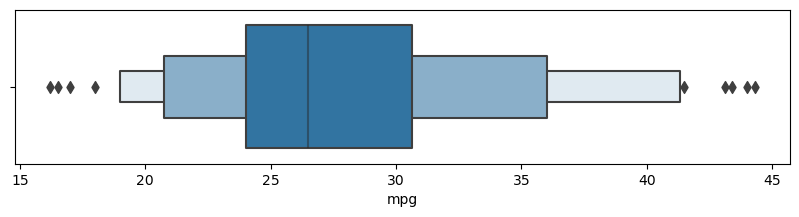

In [99]:
# europe 에 해당하는 값에 대해 boxenplot
# boxenplot : 수염에 해당하는 값을 박스로 표현
plt.figure(figsize=(10, 2))
sns.boxenplot(data=df[df['origin'] == "europe"], x="mpg")

<AxesSubplot:xlabel='mpg'>

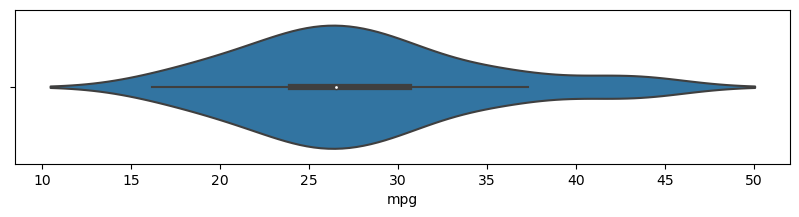

In [100]:
# europe 에 해당하는 값에 대해 violinplot
plt.figure(figsize=(10, 2))
sns.violinplot(data=df[df['origin'] == "europe"], x="mpg")

## 산점도를 이용한 범주형 데이터 표현

<AxesSubplot:xlabel='origin', ylabel='mpg'>

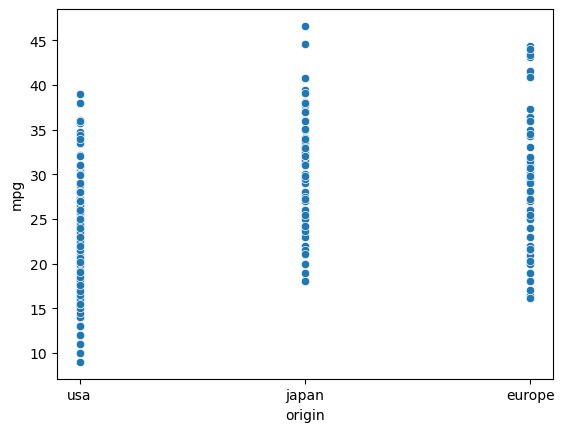

In [101]:
# 점이 겹친다는 단점
sns.scatterplot(data=df, x='origin', y='mpg')

<AxesSubplot:xlabel='origin', ylabel='mpg'>

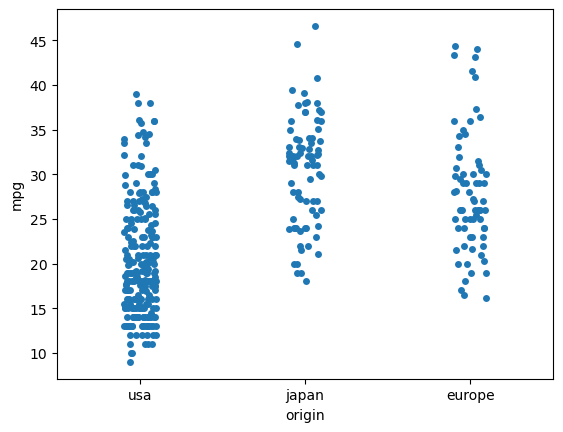

In [102]:
# 점을 옆으로 찍어줌 
# 그럼에도 겹치는 점이 존재
sns.stripplot(data=df, x='origin', y='mpg')

<AxesSubplot:xlabel='origin', ylabel='mpg'>

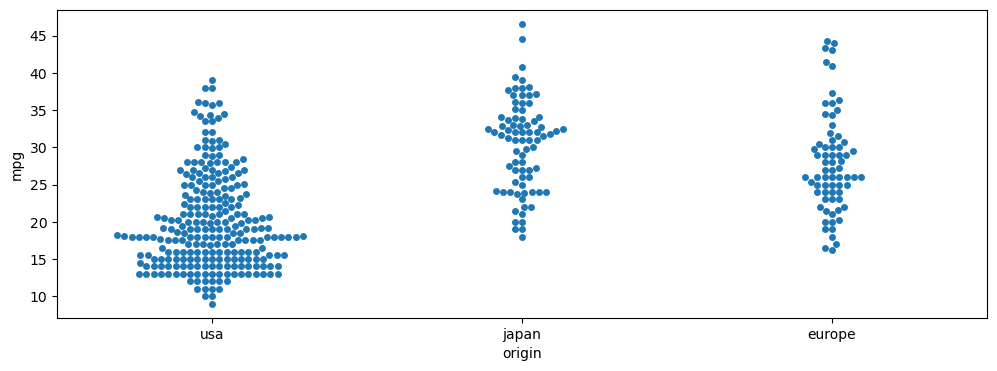

In [104]:
# 점을 옆으로 찍어줌 
# 겹치는 점이 아예 없음
plt.figure(figsize=(12, 4))
sns.swarmplot(data=df, x='origin', y='mpg')

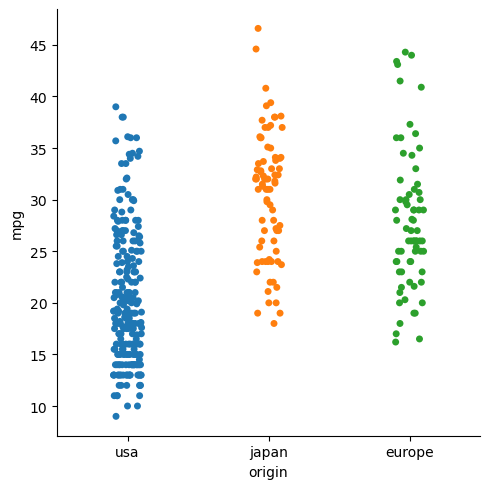

In [108]:
# catplot
sns.catplot(data=df, x="origin", y='mpg', hue='origin')

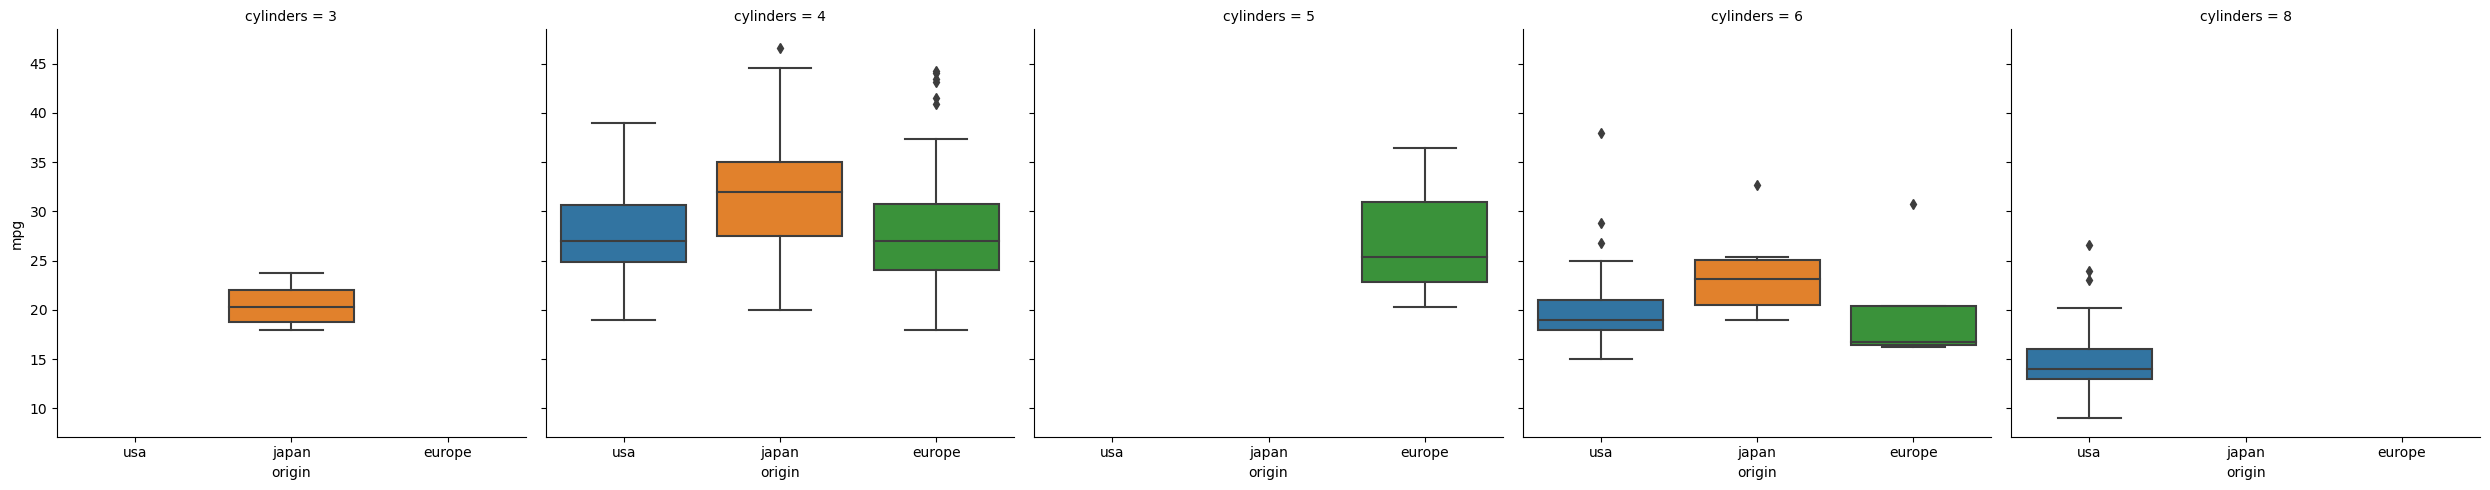

In [114]:
# catplot 으로 boxplot 그리기
sns.catplot(data=df, x='origin', y='mpg', kind='box', col="cylinders")

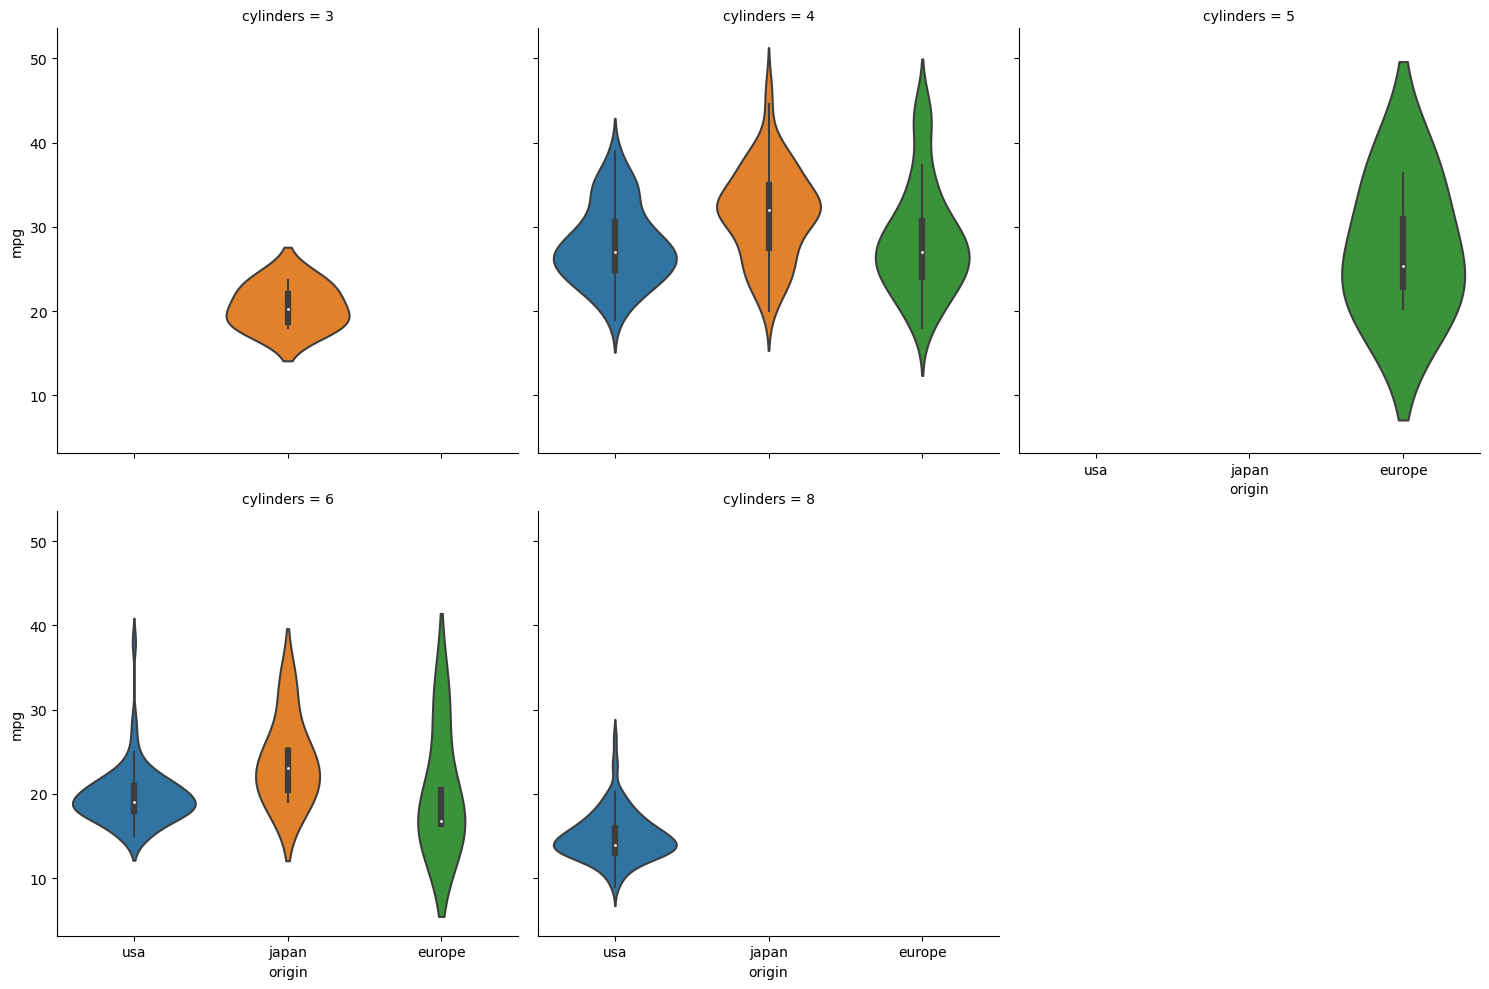

In [117]:
# catplot 으로 violinplot 그리기
sns.catplot(data=df, x='origin', y='mpg', kind='violin', col="cylinders", col_wrap=3)

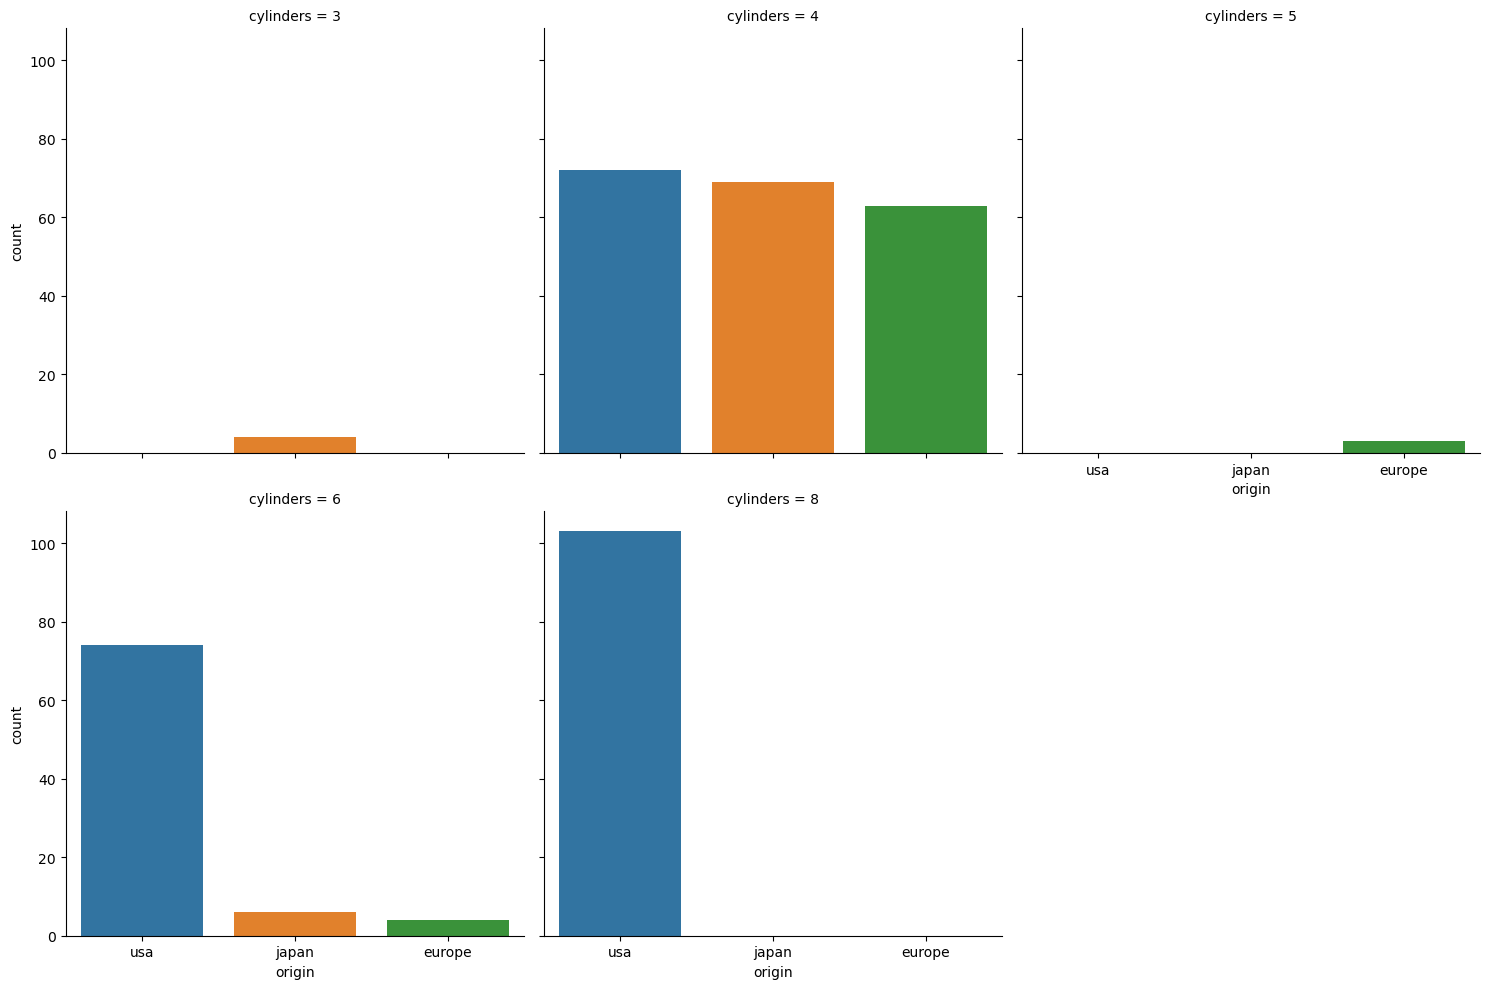

In [118]:
# catplot 으로 countplot 그리기
sns.catplot(data=df, x='origin',kind='count', col="cylinders", col_wrap=3)